#                          Python Script to Extract tweets of a particular Hashtag using Tweepy and Pandas

In [1]:
%%time
# import modules
import pandas as pd
import tweepy
 
# function to display data of each tweet
def printtweetdata(n, ith_tweet):
        print()
        print(f"Tweet {n}:")
        print(f"Username:{ith_tweet[0]}")
        print(f"Description:{ith_tweet[1]}")
        print(f"Location:{ith_tweet[2]}")
        print(f"Following Count:{ith_tweet[3]}")
        print(f"Follower Count:{ith_tweet[4]}")
        print(f"Total Tweets:{ith_tweet[5]}")
        print(f"Retweet Count:{ith_tweet[6]}")
        print(f"Tweet Text:{ith_tweet[7]}")
        print(f"Hashtags Used:{ith_tweet[8]}")
        #print(f"Date:{ith_tweet[9]}")
        print(words)

    
 
# function to perform data extraction
def scrape(words, date_since, numtweet):
 
        # Creating DataFrame using pandas
        db = pd.DataFrame(columns=['username',
                                   'description',
                                   'location',
                                   'following',
                                   'followers',
                                   'totaltweets',
                                   'retweetcount',
                                   'text',
                                   'hashtags',
                                   'SearchHastags',
                                   'Date'])
 
        # We are using .Cursor() to search
        # through twitter for the required tweets.
        # The number of tweets can be
        # restricted using .items(number of tweets)
        tweets = tweepy.Cursor(api.search_tweets,
                               words, lang="en",
                               since_id=date_since,
                               tweet_mode='extended').items(numtweet)
 
 
        # .Cursor() returns an iterable object. Each item in
        # the iterator has various attributes
        # that you can access to
        # get information about each tweet
        list_tweets = [tweet for tweet in tweets]
 
        # Counter to maintain Tweet Count
        i = 1
 
        # we will iterate over each tweet in the
        # list for extracting information about each tweet
        for tweet in list_tweets:
                username = tweet.user.screen_name
                description = tweet.user.description
                location = tweet.user.location
                following = tweet.user.friends_count
                followers = tweet.user.followers_count
                totaltweets = tweet.user.statuses_count
                retweetcount = tweet.retweet_count
                hashtags = tweet.entities['hashtags']
                search_hastags=words
                Date = tweet.created_at
 
                # Retweets can be distinguished by
                # a retweeted_status attribute,
                # in case it is an invalid reference,
                # except block will be executed
                try:
                        text = tweet.retweeted_status.full_text
                except AttributeError:
                        text = tweet.full_text
                hashtext = list()
                for j in range(0, len(hashtags)):
                        hashtext.append(hashtags[j]['text'])
 
                # Here we are appending all the
                # extracted information in the DataFrame
                ith_tweet = [username, description,
                             location, following,
                             followers, totaltweets,
                             retweetcount, text, hashtext,search_hastags,Date]
                db.loc[len(db)] = ith_tweet
 
                # Function call to print tweet data on screen
                printtweetdata(i, ith_tweet)
                i = i+1
        filename = 'Twitter_Data.csv'
 
        # we will save our database as a CSV file.
        db.to_csv(filename)
        db.head()
 
if __name__ == '__main__':
 
        # Enter your own credentials obtained
        # from your developer account
        consumer_key = "8BCiQGNdsadaqwwqJafHwg"
        consumer_secret = "fprp2O79lFRpwggdfghhnvvnhhhghgjHOmd3wrCvHZza3Vfe"
        access_key = "8550825443535345779072-lem7dqwwqwqwduKrRgyb"
        access_secret = "Ab1bgcPmq4vsdfsgbvchyhdgbkL4lt5kfV0pXgqm3"
 
 
        auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_key, access_secret)
        api = tweepy.API(auth)
 
        # Enter Hashtag and initial date
        print("Enter Twitter HashTag to search for")
        words = input()
        print("Enter Date since The Tweets are required in yyyy-mm--dd")
        date_since = input()
 
        # number of tweets you want to extract in one run
        numtweet = 1000
        scrape(words, date_since, numtweet) 
        print('Scraping has completed!')

Enter Twitter HashTag to search for


 #iphone13


Enter Date since The Tweets are required in yyyy-mm--dd


 2020-01-01



Tweet 1:
Username:MdRaihanParvej1
Description:Digital Marketing Specialist.
Location:United States
Following Count:296
Follower Count:24
Total Tweets:89
Retweet Count:0
Tweet Text:Finish the Last Survey to Win a New iPhone 14 Now! Easy Way Full Guide.
#iphone #iphone14 #iphone13 #iphone12 #iphone11 #iphone2023 #iphonegiveaway

Just Click The Link👇 And Get Your Offer Now.
https://t.co/CTOcXNQCyv https://t.co/CJ6IZq9gu7
Hashtags Used:['iphone', 'iphone14', 'iphone13', 'iphone12', 'iphone11', 'iphone2023', 'iphonegiveaway']
#iphone13

Tweet 2:
Username:MdRaihanParvej1
Description:Digital Marketing Specialist.
Location:United States
Following Count:296
Follower Count:24
Total Tweets:89
Retweet Count:0
Tweet Text:Finish a Quick Survey to Participate in Winning a new iPhone 13 Pro! An Easy Way. 
#iphone #iphone14 #iphone13 #iphone12 #iphone11 #iphone2023 #iphonegiveaway

Just Click The Link👇 And Get Your Offer Now.
https://t.co/Awxjd7CWfw https://t.co/yPjlxSLXMJ
Hashtags Used:['iphone', 'ip

# Read the csv using pandas

In [35]:
#import libraries
import pandas as pd

In [36]:
df = pd.read_csv('Twitter_Data.csv')
# Read the csv using pandas

# Append the multiple dataframe into single csv

In [37]:
df.to_csv('Twitter_Updated_Data.csv',mode='a',index=False,header=False)

In [1]:
# import modules
import pandas as pd
df = pd.read_csv('Twitter_Updated_Data.csv')
# Read the csv using pandas

# Prints information about the Twitter DataSet.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5185 entries, 0 to 5184
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     5185 non-null   int64 
 1   username       5185 non-null   object
 2   description    4388 non-null   object
 3   location       3398 non-null   object
 4   following      5185 non-null   int64 
 5   followers      5185 non-null   int64 
 6   totaltweets    5185 non-null   int64 
 7   retweetcount   5185 non-null   int64 
 8   text           5185 non-null   object
 9   hashtags       5185 non-null   object
 10  SearchHastags  5185 non-null   object
 11  Date           5185 non-null   object
dtypes: int64(5), object(7)
memory usage: 486.2+ KB


#                                        COUNT OF NULL VALUE

In [3]:
print("Number of the mobile phone dataset from Amazon: ", df.shape)
print(df.isnull().sum())
# printing count of null value present in each coloumn(attributes)

Number of the mobile phone dataset from Amazon:  (5185, 12)
Unnamed: 0          0
username            0
description       797
location         1787
following           0
followers           0
totaltweets         0
retweetcount        0
text                0
hashtags            0
SearchHastags       0
Date                0
dtype: int64


 #                                 DROP the row containg blank Reviews

In [4]:
df.dropna(subset=['text'], inplace = True)

 #               FILL Values in "description","location" column which containing blank values

In [6]:
df["description"].fillna(value = "Missing", inplace = True)
df["location"].fillna(value = "Missing", inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5185 entries, 0 to 5184
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     5185 non-null   int64 
 1   username       5185 non-null   object
 2   description    5185 non-null   object
 3   location       5185 non-null   object
 4   following      5185 non-null   int64 
 5   followers      5185 non-null   int64 
 6   totaltweets    5185 non-null   int64 
 7   retweetcount   5185 non-null   int64 
 8   text           5185 non-null   object
 9   hashtags       5185 non-null   object
 10  SearchHastags  5185 non-null   object
 11  Date           5185 non-null   object
dtypes: int64(5), object(7)
memory usage: 486.2+ KB


  #                              TEXT PROCESSING - STEP 1:- LOWER CASING

In [8]:
%%time
df['text_lower']=df['text'].str.lower()

CPU times: total: 15.6 ms
Wall time: 6 ms


 # TEXT PROCESSING - STEP 2:- REMOVAL OF URL's

In [9]:
%%time
import re
df["text_url"] = df["text_lower"].apply(lambda s: ' '.join(re.sub("(https:\/\/.*/)", " ", s).split()))

CPU times: total: 15.6 ms
Wall time: 17 ms


In [10]:
df.head()

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,SearchHastags,Date,text_lower,text_url
0,0,ZeeNewsEnglish,https://t.co/i9J1GUZmSP brings you the latest ...,India,27,5646188,452504,0,Massive discounts on Apple #iPhone13; effectiv...,"['iPhone13', 'Discounts', 'Apple', 'iPhone']",#iphone13,2022-10-21 18:28:36+00:00,massive discounts on apple #iphone13; effectiv...,massive discounts on apple #iphone13; effectiv...
1,1,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,'PayCM campaign': HC quashes cases against 2 C...,"['Iphone13', 'Breakingnews', 'Indiapolitics', ...",#iphone13,2022-10-21 18:13:35+00:00,'paycm campaign': hc quashes cases against 2 c...,'paycm campaign': hc quashes cases against 2 c...
2,2,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,Kamal Nath slams Shivraj govt over alleged cor...,"['NewsPaper', 'Breakingnews', 'Indiapolitics',...",#iphone13,2022-10-21 18:13:34+00:00,kamal nath slams shivraj govt over alleged cor...,kamal nath slams shivraj govt over alleged cor...
3,3,d_rocky98,Missing,Missing,132,18,120,0,https://t.co/BEA3WhsrPU\nChance to win for fre...,"['Iphone', 'iPhone13', 'iPhone13Pro', 'iPhone1...",#iphone13,2022-10-21 17:56:14+00:00,https://t.co/bea3whsrpu\nchance to win for fre...,bea3whsrpu chance to win for free iphone 13/14...
4,4,cylartgallery,Art Gallery by Simone Morana Cyla @cyla78 #art...,Las Palmas de Gran Canaria,3035,2411,569,10,🥰 RAZR CASES COLLECTION ❤️\n👉👉 https://t.co/aw...,"['iphone', 'society6', 'fashion', 'fashionblog...",#iphone13,2022-10-21 17:46:50+00:00,🥰 razr cases collection ❤️\n👉👉 https://t.co/aw...,🥰 razr cases collection ❤️ 👉👉 awofddwkft #ipho...


 #                               TEXT PROCESSING - STEP 3:- Removal of Punctuations

In [11]:
%%time
df["text_punct"] = df['text_url'].str.replace('[^\w\s]','')

CPU times: total: 15.6 ms
Wall time: 21 ms


<timed exec>:1: FutureWarning: The default value of regex will change from True to False in a future version.


In [12]:
df.head()

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,SearchHastags,Date,text_lower,text_url,text_punct
0,0,ZeeNewsEnglish,https://t.co/i9J1GUZmSP brings you the latest ...,India,27,5646188,452504,0,Massive discounts on Apple #iPhone13; effectiv...,"['iPhone13', 'Discounts', 'Apple', 'iPhone']",#iphone13,2022-10-21 18:28:36+00:00,massive discounts on apple #iphone13; effectiv...,massive discounts on apple #iphone13; effectiv...,massive discounts on apple iphone13 effective ...
1,1,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,'PayCM campaign': HC quashes cases against 2 C...,"['Iphone13', 'Breakingnews', 'Indiapolitics', ...",#iphone13,2022-10-21 18:13:35+00:00,'paycm campaign': hc quashes cases against 2 c...,'paycm campaign': hc quashes cases against 2 c...,paycm campaign hc quashes cases against 2 cong...
2,2,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,Kamal Nath slams Shivraj govt over alleged cor...,"['NewsPaper', 'Breakingnews', 'Indiapolitics',...",#iphone13,2022-10-21 18:13:34+00:00,kamal nath slams shivraj govt over alleged cor...,kamal nath slams shivraj govt over alleged cor...,kamal nath slams shivraj govt over alleged cor...
3,3,d_rocky98,Missing,Missing,132,18,120,0,https://t.co/BEA3WhsrPU\nChance to win for fre...,"['Iphone', 'iPhone13', 'iPhone13Pro', 'iPhone1...",#iphone13,2022-10-21 17:56:14+00:00,https://t.co/bea3whsrpu\nchance to win for fre...,bea3whsrpu chance to win for free iphone 13/14...,bea3whsrpu chance to win for free iphone 1314 ...
4,4,cylartgallery,Art Gallery by Simone Morana Cyla @cyla78 #art...,Las Palmas de Gran Canaria,3035,2411,569,10,🥰 RAZR CASES COLLECTION ❤️\n👉👉 https://t.co/aw...,"['iphone', 'society6', 'fashion', 'fashionblog...",#iphone13,2022-10-21 17:46:50+00:00,🥰 razr cases collection ❤️\n👉👉 https://t.co/aw...,🥰 razr cases collection ❤️ 👉👉 awofddwkft #ipho...,razr cases collection awofddwkft iphone soc...


In [49]:
%%time
pip install nltk

Note: you may need to restart the kernel to use updated packages.
CPU times: total: 0 ns
Wall time: 1.72 s



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\prngr\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [ ]:
%%time
import nltk
nltk.download()

In [13]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

 #                               TEXT PROCESSING - STEP 4:- Stop-word Removal

In [14]:
%%time
df['text_stopwords'] = df['text_punct'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

CPU times: total: 125 ms
Wall time: 120 ms


In [15]:
df.head()

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,SearchHastags,Date,text_lower,text_url,text_punct,text_stopwords
0,0,ZeeNewsEnglish,https://t.co/i9J1GUZmSP brings you the latest ...,India,27,5646188,452504,0,Massive discounts on Apple #iPhone13; effectiv...,"['iPhone13', 'Discounts', 'Apple', 'iPhone']",#iphone13,2022-10-21 18:28:36+00:00,massive discounts on apple #iphone13; effectiv...,massive discounts on apple #iphone13; effectiv...,massive discounts on apple iphone13 effective ...,massive discounts apple iphone13 effective pri...
1,1,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,'PayCM campaign': HC quashes cases against 2 C...,"['Iphone13', 'Breakingnews', 'Indiapolitics', ...",#iphone13,2022-10-21 18:13:35+00:00,'paycm campaign': hc quashes cases against 2 c...,'paycm campaign': hc quashes cases against 2 c...,paycm campaign hc quashes cases against 2 cong...,paycm campaign hc quashes cases 2 cong leaders...
2,2,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,Kamal Nath slams Shivraj govt over alleged cor...,"['NewsPaper', 'Breakingnews', 'Indiapolitics',...",#iphone13,2022-10-21 18:13:34+00:00,kamal nath slams shivraj govt over alleged cor...,kamal nath slams shivraj govt over alleged cor...,kamal nath slams shivraj govt over alleged cor...,kamal nath slams shivraj govt alleged corrupti...
3,3,d_rocky98,Missing,Missing,132,18,120,0,https://t.co/BEA3WhsrPU\nChance to win for fre...,"['Iphone', 'iPhone13', 'iPhone13Pro', 'iPhone1...",#iphone13,2022-10-21 17:56:14+00:00,https://t.co/bea3whsrpu\nchance to win for fre...,bea3whsrpu chance to win for free iphone 13/14...,bea3whsrpu chance to win for free iphone 1314 ...,bea3whsrpu chance win free iphone 1314 promax ...
4,4,cylartgallery,Art Gallery by Simone Morana Cyla @cyla78 #art...,Las Palmas de Gran Canaria,3035,2411,569,10,🥰 RAZR CASES COLLECTION ❤️\n👉👉 https://t.co/aw...,"['iphone', 'society6', 'fashion', 'fashionblog...",#iphone13,2022-10-21 17:46:50+00:00,🥰 razr cases collection ❤️\n👉👉 https://t.co/aw...,🥰 razr cases collection ❤️ 👉👉 awofddwkft #ipho...,razr cases collection awofddwkft iphone soc...,razr cases collection awofddwkft iphone societ...


In [16]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\prngr\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [17]:
from textblob import TextBlob

 #                               TEXT PROCESSING - STEP 5:- Spelling Correction

In [18]:
%%time
df['text_correct'] = df['text_stopwords'].apply(lambda x : str(TextBlob(x).correct()))                                                 

CPU times: total: 2h 13min 22s
Wall time: 2h 13min 36s


In [19]:
pip install demoji

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\prngr\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [20]:
import demoji
demoji.download_codes()

C:\Users\prngr\AppData\Local\Temp\ipykernel_24208\2319952594.py:2: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


 #                               TEXT PROCESSING - STEP 6:- Converting Emoji and emoticons to words

In [21]:
%%time
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')
df["text_emoji"] = df["text_correct"].apply(lambda s: deEmojify(s))

CPU times: total: 0 ns
Wall time: 3 ms


In [22]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\prngr\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [23]:
pip install requests

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: certifi>=2017.4.17 in c:\users\prngr\appdata\local\programs\python\python310\lib\site-packages (from requests) (2021.10.8)



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\prngr\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


#                               TEXT PROCESSING - STEP 7:- Removal of HTML Tags

In [24]:
from bs4 import BeautifulSoup
def remove_tags(text):
  UPDATED_TEXT = BeautifulSoup(text, "html.parser")
  for data in UPDATED_TEXT(['style', 'script']):
    data.decompose()
  return ' '.join(UPDATED_TEXT.stripped_strings)

In [25]:
%%time
df["text_removetag"] = df["text_emoji"].apply(remove_tags)

CPU times: total: 281 ms
Wall time: 280 ms


In [26]:
df.head()

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,SearchHastags,Date,text_lower,text_url,text_punct,text_stopwords,text_correct,text_emoji,text_removetag
0,0,ZeeNewsEnglish,https://t.co/i9J1GUZmSP brings you the latest ...,India,27,5646188,452504,0,Massive discounts on Apple #iPhone13; effectiv...,"['iPhone13', 'Discounts', 'Apple', 'iPhone']",#iphone13,2022-10-21 18:28:36+00:00,massive discounts on apple #iphone13; effectiv...,massive discounts on apple #iphone13; effectiv...,massive discounts on apple iphone13 effective ...,massive discounts apple iphone13 effective pri...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...
1,1,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,'PayCM campaign': HC quashes cases against 2 C...,"['Iphone13', 'Breakingnews', 'Indiapolitics', ...",#iphone13,2022-10-21 18:13:35+00:00,'paycm campaign': hc quashes cases against 2 c...,'paycm campaign': hc quashes cases against 2 c...,paycm campaign hc quashes cases against 2 cong...,paycm campaign hc quashes cases 2 cong leaders...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bushes cases 2 cong leaders ml...
2,2,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,Kamal Nath slams Shivraj govt over alleged cor...,"['NewsPaper', 'Breakingnews', 'Indiapolitics',...",#iphone13,2022-10-21 18:13:34+00:00,kamal nath slams shivraj govt over alleged cor...,kamal nath slams shivraj govt over alleged cor...,kamal nath slams shivraj govt over alleged cor...,kamal nath slams shivraj govt alleged corrupti...,canal path slums shivraj got alleged corruptio...,canal path slums shivraj got alleged corruptio...,canal path slums shivraj got alleged corruptio...
3,3,d_rocky98,Missing,Missing,132,18,120,0,https://t.co/BEA3WhsrPU\nChance to win for fre...,"['Iphone', 'iPhone13', 'iPhone13Pro', 'iPhone1...",#iphone13,2022-10-21 17:56:14+00:00,https://t.co/bea3whsrpu\nchance to win for fre...,bea3whsrpu chance to win for free iphone 13/14...,bea3whsrpu chance to win for free iphone 1314 ...,bea3whsrpu chance win free iphone 1314 promax ...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...
4,4,cylartgallery,Art Gallery by Simone Morana Cyla @cyla78 #art...,Las Palmas de Gran Canaria,3035,2411,569,10,🥰 RAZR CASES COLLECTION ❤️\n👉👉 https://t.co/aw...,"['iphone', 'society6', 'fashion', 'fashionblog...",#iphone13,2022-10-21 17:46:50+00:00,🥰 razr cases collection ❤️\n👉👉 https://t.co/aw...,🥰 razr cases collection ❤️ 👉👉 awofddwkft #ipho...,razr cases collection awofddwkft iphone soc...,razr cases collection awofddwkft iphone societ...,razor cases collection awofddwkft phone societ...,razor cases collection awofddwkft phone societ...,razor cases collection awofddwkft phone societ...


In [27]:
import nltk
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to C:\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

 #                              TEXT PROCESSING - STEP 8:- Lemmatization

In [29]:
def lemmatized(string):
  # Converting String into tokens
  list2 = nltk.word_tokenize(string)
  #print(list2) 
  lemmatized_string = ' '.join([wnl.lemmatize(words) for words in list2])
  return lemmatized_string

In [30]:
%%time
df["text_lemmatized"] = df["text_removetag"].apply(lemmatized)

CPU times: total: 1.42 s
Wall time: 1.42 s


In [31]:
filename = 'Data_Twitter_Updated.csv'
df.to_csv(filename)

  #                              Sentimental Ploarity score 

In [32]:
def sentiment_p(text):
    sentiment_score = TextBlob(text).sentiment.polarity
    return sentiment_score

 #                               Sentimental Subjectivity score 

In [33]:
def sentiment_s(text):
    sentiment_score = TextBlob(text).sentiment.subjectivity
    return sentiment_score

In [34]:
%%time
df["Reviews_Sentiment_polarity"]= df["text_lemmatized"].apply(sentiment_p)

CPU times: total: 641 ms
Wall time: 627 ms


In [35]:
%%time
df["Reviews_Sentiment_subjectivity"]= df["text_lemmatized"].apply(sentiment_s)

CPU times: total: 609 ms
Wall time: 599 ms


In [36]:
df.head()

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,...,text_lower,text_url,text_punct,text_stopwords,text_correct,text_emoji,text_removetag,text_lemmatized,Reviews_Sentiment_polarity,Reviews_Sentiment_subjectivity
0,0,ZeeNewsEnglish,https://t.co/i9J1GUZmSP brings you the latest ...,India,27,5646188,452504,0,Massive discounts on Apple #iPhone13; effectiv...,"['iPhone13', 'Discounts', 'Apple', 'iPhone']",...,massive discounts on apple #iphone13; effectiv...,massive discounts on apple #iphone13; effectiv...,massive discounts on apple iphone13 effective ...,massive discounts apple iphone13 effective pri...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,0.30,0.90
1,1,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,'PayCM campaign': HC quashes cases against 2 C...,"['Iphone13', 'Breakingnews', 'Indiapolitics', ...",...,'paycm campaign': hc quashes cases against 2 c...,'paycm campaign': hc quashes cases against 2 c...,paycm campaign hc quashes cases against 2 cong...,paycm campaign hc quashes cases 2 cong leaders...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bush case 2 cong leader mleqjq...,0.16,0.54
2,2,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,Kamal Nath slams Shivraj govt over alleged cor...,"['NewsPaper', 'Breakingnews', 'Indiapolitics',...",...,kamal nath slams shivraj govt over alleged cor...,kamal nath slams shivraj govt over alleged cor...,kamal nath slams shivraj govt over alleged cor...,kamal nath slams shivraj govt alleged corrupti...,canal path slums shivraj got alleged corruptio...,canal path slums shivraj got alleged corruptio...,canal path slums shivraj got alleged corruptio...,canal path slum shivraj got alleged corruption...,-0.10,0.10
3,3,d_rocky98,Missing,Missing,132,18,120,0,https://t.co/BEA3WhsrPU\nChance to win for fre...,"['Iphone', 'iPhone13', 'iPhone13Pro', 'iPhone1...",...,https://t.co/bea3whsrpu\nchance to win for fre...,bea3whsrpu chance to win for free iphone 13/14...,bea3whsrpu chance to win for free iphone 1314 ...,bea3whsrpu chance win free iphone 1314 promax ...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,0.60,0.60
4,4,cylartgallery,Art Gallery by Simone Morana Cyla @cyla78 #art...,Las Palmas de Gran Canaria,3035,2411,569,10,🥰 RAZR CASES COLLECTION ❤️\n👉👉 https://t.co/aw...,"['iphone', 'society6', 'fashion', 'fashionblog...",...,🥰 razr cases collection ❤️\n👉👉 https://t.co/aw...,🥰 razr cases collection ❤️ 👉👉 awofddwkft #ipho...,razr cases collection awofddwkft iphone soc...,razr cases collection awofddwkft iphone societ...,razor cases collection awofddwkft phone societ...,razor cases collection awofddwkft phone societ...,razor cases collection awofddwkft phone societ...,razor case collection awofddwkft phone society...,0.00,0.00


#                                    Return value according to Sentiment Ploarity Score

In [37]:
def sentiment(value):
    if value > 0:
        return 'POSITIVE'
    if value < 0:
        return 'NEGATIVE'
    else:
        return 'NEUTRAL'

In [38]:
df['Sentiment']=df['Reviews_Sentiment_polarity'].apply(sentiment)

 #                                  Return value according to Sentiment Subjectivity Score

In [39]:
def subjective(value):
    if value > 0.0:
        return 'objective'
    else:
        return 'subjective'

In [40]:
df['Subjectivity']=df['Reviews_Sentiment_subjectivity'].apply(subjective)

In [41]:
df.head()

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,...,text_punct,text_stopwords,text_correct,text_emoji,text_removetag,text_lemmatized,Reviews_Sentiment_polarity,Reviews_Sentiment_subjectivity,Sentiment,Subjectivity
0,0,ZeeNewsEnglish,https://t.co/i9J1GUZmSP brings you the latest ...,India,27,5646188,452504,0,Massive discounts on Apple #iPhone13; effectiv...,"['iPhone13', 'Discounts', 'Apple', 'iPhone']",...,massive discounts on apple iphone13 effective ...,massive discounts apple iphone13 effective pri...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,0.30,0.90,POSITIVE,objective
1,1,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,'PayCM campaign': HC quashes cases against 2 C...,"['Iphone13', 'Breakingnews', 'Indiapolitics', ...",...,paycm campaign hc quashes cases against 2 cong...,paycm campaign hc quashes cases 2 cong leaders...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bush case 2 cong leader mleqjq...,0.16,0.54,POSITIVE,objective
2,2,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,Kamal Nath slams Shivraj govt over alleged cor...,"['NewsPaper', 'Breakingnews', 'Indiapolitics',...",...,kamal nath slams shivraj govt over alleged cor...,kamal nath slams shivraj govt alleged corrupti...,canal path slums shivraj got alleged corruptio...,canal path slums shivraj got alleged corruptio...,canal path slums shivraj got alleged corruptio...,canal path slum shivraj got alleged corruption...,-0.10,0.10,NEGATIVE,objective
3,3,d_rocky98,Missing,Missing,132,18,120,0,https://t.co/BEA3WhsrPU\nChance to win for fre...,"['Iphone', 'iPhone13', 'iPhone13Pro', 'iPhone1...",...,bea3whsrpu chance to win for free iphone 1314 ...,bea3whsrpu chance win free iphone 1314 promax ...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,0.60,0.60,POSITIVE,objective
4,4,cylartgallery,Art Gallery by Simone Morana Cyla @cyla78 #art...,Las Palmas de Gran Canaria,3035,2411,569,10,🥰 RAZR CASES COLLECTION ❤️\n👉👉 https://t.co/aw...,"['iphone', 'society6', 'fashion', 'fashionblog...",...,razr cases collection awofddwkft iphone soc...,razr cases collection awofddwkft iphone societ...,razor cases collection awofddwkft phone societ...,razor cases collection awofddwkft phone societ...,razor cases collection awofddwkft phone societ...,razor case collection awofddwkft phone society...,0.00,0.00,NEUTRAL,subjective


In [42]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [57]:
df

,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,SearchHastags,...,text_punct,text_stopwords,text_correct,text_emoji,text_removetag,text_lemmatized,Reviews_Sentiment_polarity,Reviews_Sentiment_subjectivity,Sentiment,Subjectivity
0,ZeeNewsEnglish,https://t.co/i9J1GUZmSP brings you the latest ...,India,27,5646188,452504,0,Massive discounts on Apple #iPhone13; effectiv...,"['iPhone13', 'Discounts', 'Apple', 'iPhone']",#iphone13,...,massive discounts on apple iphone13 effective ...,massive discounts apple iphone13 effective pri...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,0.300000,0.900000,POSITIVE,objective
1,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,'PayCM campaign': HC quashes cases against 2 C...,"['Iphone13', 'Breakingnews', 'Indiapolitics', ...",#iphone13,...,paycm campaign hc quashes cases against 2 cong...,paycm campaign hc quashes cases 2 cong leaders...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bush case 2 cong leader mleqjq...,0.160000,0.540000,POSITIVE,objective
2,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,Kamal Nath slams Shivraj govt over alleged cor...,"['NewsPaper', 'Breakingnews', 'Indiapolitics',...",#iphone13,...,kamal nath slams shivraj govt over alleged cor...,kamal nath slams shivraj govt alleged corrupti...,canal path slums shivraj got alleged corruptio...,canal path slums shivraj got alleged corruptio...,canal path slums shivraj got alleged corruptio...,canal path slum shivraj got alleged corruption...,-0.100000,0.100000,NEGATIVE,objective
3,d_rocky98,Missing,Missing,132,18,120,0,https://t.co/BEA3WhsrPU\nChance to win for fre...,"['Iphone', 'iPhone13', 'iPhone13Pro', 'iPhone1...",#iphone13,...,bea3whsrpu chance to win for free iphone 1314 ...,bea3whsrpu chance win free iphone 1314 promax ...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,0.600000,0.600000,POSITIVE,objective
4,cylartgallery,Art Gallery by Simone Morana Cyla @cyla78 #art...,Las Palmas de Gran Canaria,3035,2411,569,10,🥰 RAZR CASES COLLECTION ❤️\n👉👉 https://t.co/aw...,"['iphone', 'society6', 'fashion', 'fashionblog...",#iphone13,...,razr cases collection awofddwkft iphone soc...,razr cases collection awofddwkft iphone societ...,razor cases collection awofddwkft phone societ...,razor cases collection awofddwkft phone societ...,razor cases collection awofddwkft phone societ...,razor case collection awofddwkft phone society...,0.000000,0.000000,NEUTRAL,subjective
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5180,NAIJAVILLE1,"🐼A platform for all gists,topics and news arou...","Ikeja, Nigeria",1259,246,9714,0,@DONJAZZY \nDAY 3 COUNTDOWN SEEKING OF BIRTHDA...,"['DonJazzy', 'birthday', '25y', 'cakes', 'lapt...",#iphone11,...,donjazzy day 3 countdown seeking of birthday g...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,0.800000,0.750000,POSITIVE,objective
5181,YaD3v,‏الصفحة الخاصه بـ YaD3v لبرمجة تطبيقات الـ iOS...,Saudi Arabia,6,129,2390,0,Download #UTG pro to get all #video_games info...,"['UTG', 'video_games', 'iOS', 'iPhone', 'iPad'...",#iphone11,...,download utg pro to get all video_games inform...,download utg pro get video_games information w...,download ut pro get video_games information wa...,download ut pro get video_games information wa...,downlo

In [44]:
filename = 'Twitter_Final_Data.csv'
df.to_csv(filename)

# Countplot of Sentiment

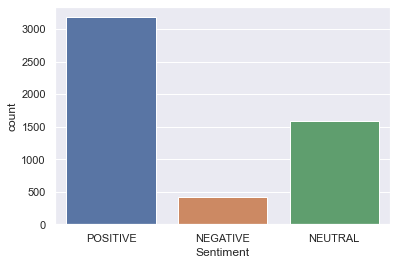

In [52]:
import seaborn as sns
sns.set_theme(style="darkgrid")
#titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="Sentiment", data=df)

C:\Users\prngr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


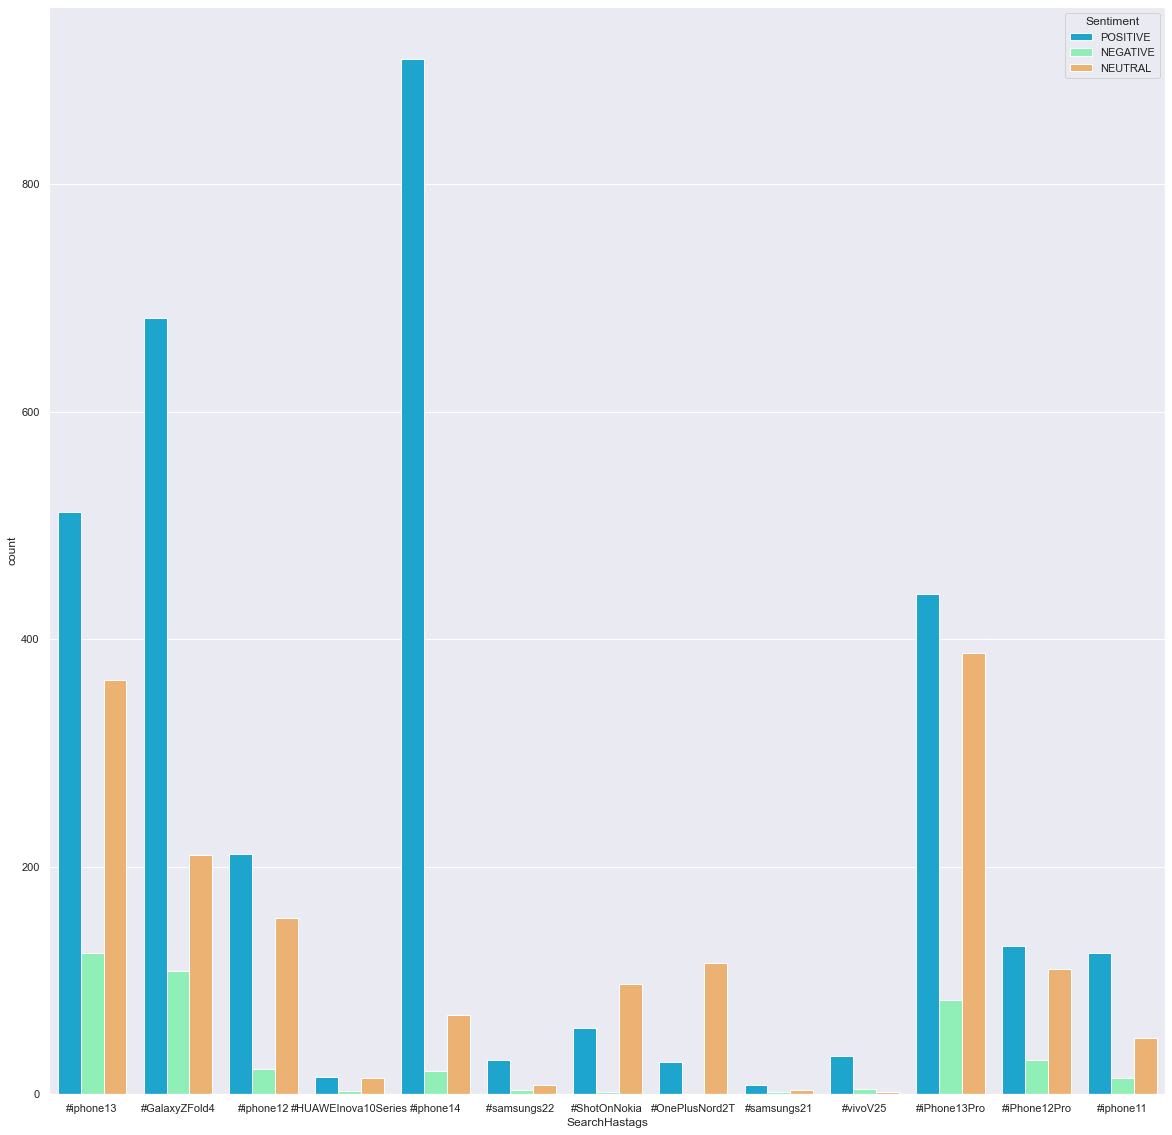

In [53]:
import seaborn as sns
from matplotlib import pyplot
sns.set_theme(style="darkgrid")
#titanic = sns.load_dataset("titanic")
x=df["SearchHastags"]
#x=df["Brand Name"].values[1]
a4_dims = (20, 20)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.countplot(x,hue="Sentiment", data=df,palette="rainbow",ax=ax)

 # Extract Output to MYSQL

In [50]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\prngr\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [51]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\prngr\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [55]:
import pyodbc as pyodbc
conn_str = (
    r'DRIVER={SQL Server};'
    r'SERVER=LAPTOP-AAHQHGCP\SQLEXPRESS;'
    r'DATABASE=Sentimental_Analysis;'
    r'Trusted_Connection=yes;'
)
cnxn = pyodbc.connect(conn_str)
print('CONNECTION SUCCESSFUL ')

CONNECTION SUCCESSFUL 


In [56]:
import MySQLdb
import csv
import sys
cursor = cnxn.cursor()
#csv_data = csv.reader(open('Sentimental_analysis_Amazon_Data.csv'),encoding='cp850')
#csv_data = csv.reader(open('Sample123.csv'))
with open('Twitter_Final_Data.csv', mode ='r',encoding='cp850')as file: 
  # reading the CSV file
  csv_data = csv.reader(file)
  header = next(csv_data)

  #print('Importing the CSV Files')
  for row in csv_data:
    #print(row)
    try:
        cursor.execute(
          "INSERT INTO twitter_data VALUES (?, ?, ?, ?,?, ?, ?, ?,?, ?, ?, ?,?, ?, ?, ?,?,?,?,?,?,?,?,?)", tuple(row))
    except:
        print("An exception occurred")
        
        
cnxn.commit()
cursor.close()
print("Finish")

Finish
